## EDA
- **Read the data dictionary.**
- Determine _what_ missing values mean.
- Figure out what each categorical value represents.
- Identify outliers.
- Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)

## Data Cleaning
- Decide how to impute null values.
- Decide how to handle outliers.
- Do you want to combine any features?
- Do you want to have interaction terms?
- Do you want to manually drop collinear features?

In [203]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression #class(LinearRegression) inside module(linear_model) inside library(sklearn)
from sklearn import metrics

In [204]:
# Set up the data
data = "../data/"
train = "datasets/train.csv"
test = "datasets/test.csv"

In [205]:
#Read in the data
train_df = pd.read_csv(data+train)
test_df = pd.read_csv(data+test)

In [206]:
# Select only integer data types for simplicity
integer_feature = list(train_df.select_dtypes(include=['int64']).columns)
integer_feature.remove('Id')
integer_feature.remove('PID')
integer_feature
integer_df = train_df[integer_feature]
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)

In [207]:
#Create list of features with NO null values (excluding 'SalePrice')
null_features = []
nulless_features = []
for column in test_df.columns:
    if (train_df[column].isnull().sum()>0) | (test_df[column].isnull().sum()>0):
        null_features.append(column)
        print(f'Train {column}:\t{train_df[column].isnull().sum()} null ',f'Test {column}:\t{test_df[column].isnull().sum()} null ' )
    else:
        nulless_features.append(column)
nulless_features.remove('Id')
nulless_features.remove('PID')

Train Lot Frontage:	330 null  Test Lot Frontage:	160 null 
Train Alley:	1911 null  Test Alley:	820 null 
Train Mas Vnr Type:	22 null  Test Mas Vnr Type:	1 null 
Train Mas Vnr Area:	22 null  Test Mas Vnr Area:	1 null 
Train Bsmt Qual:	55 null  Test Bsmt Qual:	25 null 
Train Bsmt Cond:	55 null  Test Bsmt Cond:	25 null 
Train Bsmt Exposure:	58 null  Test Bsmt Exposure:	25 null 
Train BsmtFin Type 1:	55 null  Test BsmtFin Type 1:	25 null 
Train BsmtFin SF 1:	1 null  Test BsmtFin SF 1:	0 null 
Train BsmtFin Type 2:	56 null  Test BsmtFin Type 2:	25 null 
Train BsmtFin SF 2:	1 null  Test BsmtFin SF 2:	0 null 
Train Bsmt Unf SF:	1 null  Test Bsmt Unf SF:	0 null 
Train Total Bsmt SF:	1 null  Test Total Bsmt SF:	0 null 
Train Electrical:	0 null  Test Electrical:	1 null 
Train Bsmt Full Bath:	2 null  Test Bsmt Full Bath:	0 null 
Train Bsmt Half Bath:	2 null  Test Bsmt Half Bath:	0 null 
Train Fireplace Qu:	1000 null  Test Fireplace Qu:	422 null 
Train Garage Type:	113 null  Test Garage Type:	44 n

In [208]:
list(train_df[null_features].isnull().sum().index)

['Lot Frontage',
 'Alley',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Electrical',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

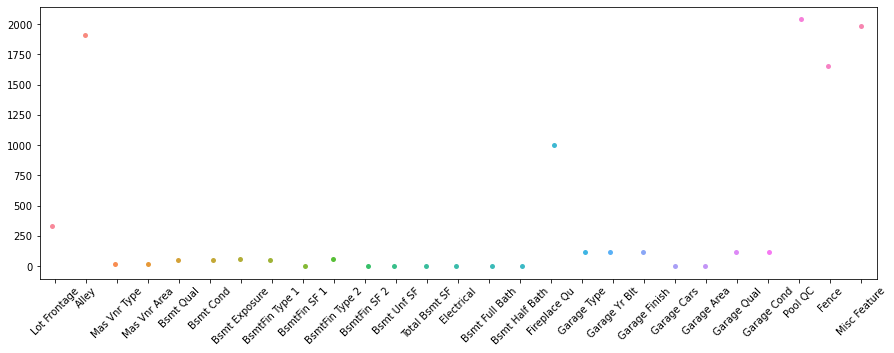

In [209]:
# Check that everything is copacetic
train_df.head()
train_df.isnull().sum()
plt.figure(figsize = (15, 5));
sns.stripplot(x=null_features,y=train_df[null_features].isnull().sum())
plt.xticks( rotation=45 );

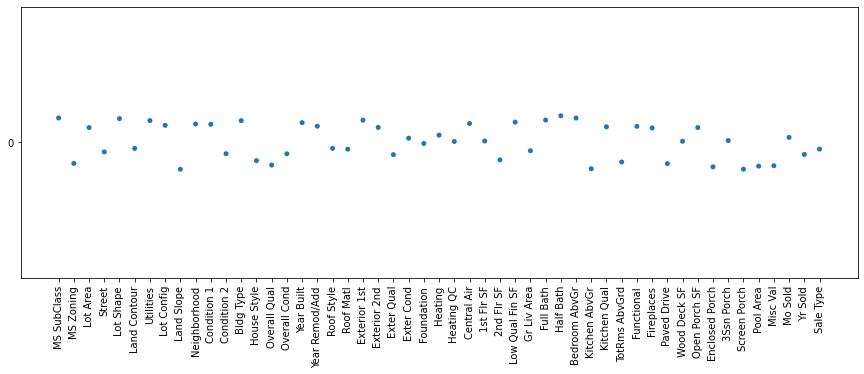

In [210]:
test_df.head()
train_df.isnull().sum()
plt.figure(figsize = (15, 5));
sns.stripplot(x=nulless_features,y=test_df[nulless_features].isnull().sum(),orient='h')
plt.xticks( rotation=90 );

In [211]:
print(train_df['MS Zoning'].value_counts())
train_df.groupby('MS Zoning')['SalePrice'].describe() #MS Zoning: RL-Residential Low Density Housing, {RH, RM}, {A (agr), C (all), FV, I (all)}

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64


,count,mean,std,min,25%,50%,75%,max
MS Zoning,,,,,,,,
A (agr),2.0,47300.000000,48366.103833,13100.0,30200.0,47300.0,64400.0,81500.0
C (all),19.0,78010.894737,32781.478897,34900.0,50913.5,75000.0,105388.0,140000.0
FV,101.0,218618.316832,53063.423791,144152.0,176500.0,208900.0,254900.0,370878.0
I (all),1.0,57625.000000,NaN,57625.0,57625.0,57625.0,57625.0,57625.0
RH,14.0,148859.571429,35970.877401,82000.0,128500.0,152217.0,180000.0,200000.0
RL,1598.0,191235.164581,80380.790716,35000.0,137500.0,172500.0,222375.0,611657.0
RM,316.0,129119.142405,50776.911622,12789.0,103300.0,123900.0,141500.0,475000.0


In [212]:
print(test_df['Overall Qual'].value_counts())
train_df.groupby('Overall Qual')['SalePrice'].describe()

5     262
6     226
7     171
8     100
4      67
9      30
3      11
10      7
2       4
Name: Overall Qual, dtype: int64


,count,mean,std,min,25%,50%,75%,max
Overall Qual,,,,,,,,
1,4.0,48725.000000,29341.935292,13100.0,32750.0,50150.0,66125.00,81500.0
2,9.0,51081.000000,21044.635997,12789.0,35311.0,57625.0,63900.00,82000.0
3,29.0,81309.103448,23905.920174,37900.0,64500.0,81400.0,93500.00,139600.0
4,159.0,107744.037736,30799.878602,34900.0,86950.0,106500.0,125500.00,256000.0
5,563.0,134963.644760,26631.294740,55993.0,120000.0,133500.0,148000.00,284700.0
6,506.0,162891.102767,38643.606137,79000.0,137462.5,160000.0,183425.00,415000.0
7,431.0,203430.285383,42722.280426,105000.0,175950.0,197900.0,226250.00,383970.0
8,250.0,271437.044000,62023.449524,122000.0,230000.0,267150.0,305369.25,538000.0
9,77.0,370197.376623,84457.638065,150000.0,319900.0,359900.0,410000.00,611657.0


In [213]:
print(test_df['Overall Cond'].value_counts())
train_df.groupby('Overall Cond')['SalePrice'].describe()

5    485
6    165
7    120
8     43
4     31
3     15
9     12
2      4
1      3
Name: Overall Cond, dtype: int64


,count,mean,std,min,25%,50%,75%,max
Overall Cond,,,,,,,,
1,4.0,59625.000000,6625.393070,50000.0,58250.0,61750.0,63125.0,65000.0
2,6.0,65364.833333,27373.892309,12789.0,64675.0,71750.0,82875.0,87000.0
3,35.0,99786.000000,42905.475402,35000.0,67500.0,91500.0,126000.0,200624.0
4,70.0,114034.571429,41244.296590,40000.0,85000.0,110479.5,136800.0,260000.0
5,1168.0,207055.988870,86421.186973,13100.0,146000.0,187593.5,248125.0,611657.0
6,368.0,148952.665761,42074.269804,37900.0,123000.0,142500.0,170250.0,392000.0
7,270.0,155327.270370,51306.374350,50138.0,123600.0,142750.0,175750.0,402000.0
8,101.0,155913.366337,53765.853890,84500.0,127500.0,144000.0,167500.0,415000.0
9,29.0,198177.586207,90026.013687,88750.0,143000.0,161000.0,266500.0,475000.0


In [214]:
print(test_df['Exter Cond'].value_counts())
train_df.groupby('Exter Cond')['SalePrice'].describe()

TA    770
Gd     84
Fa     18
Ex      5
Po      1
Name: Exter Cond, dtype: int64


,count,mean,std,min,25%,50%,75%,max
Exter Cond,,,,,,,,
Ex,7.0,236263.857143,125625.937519,118000.0,145250.0,173000.0,307500.0,457347.0
Fa,49.0,102507.693878,45846.944967,12789.0,67000.0,92000.0,135900.0,260000.0
Gd,215.0,167623.023256,65028.258248,45000.0,128000.0,150000.0,190050.0,584500.0
Po,2.0,44800.000000,44830.569927,13100.0,28950.0,44800.0,60650.0,76500.0
TA,1778.0,185258.202475,79901.480417,34900.0,131100.0,167000.0,217000.0,611657.0


In [215]:
print(test_df['Pool QC'].value_counts())
train_df.groupby('Pool QC')['SalePrice'].describe()

Ex    3
TA    1
Name: Pool QC, dtype: int64


,count,mean,std,min,25%,50%,75%,max
Pool QC,,,,,,,,
Ex,1.0,315000.0,NaN,315000.0,315000.0,315000.0,315000.0,315000.0
Fa,2.0,215500.0,48790.367902,181000.0,198250.0,215500.0,232750.0,250000.0
Gd,4.0,216492.5,59367.473348,160000.0,168250.0,215500.0,263742.5,274970.0
TA,2.0,141500.0,16263.455967,130000.0,135750.0,141500.0,147250.0,153000.0


In [216]:
# Get correlation of variables.
corr = train_df[null_features].corr()
print(corr)
# Get correlation of variables.
corr = train_df.corr()
corr['SalePrice'].sort_values()

                Lot Frontage  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
Lot Frontage        1.000000      0.218218      0.214178      0.036740   
Mas Vnr Area        0.218218      1.000000      0.321807     -0.016756   
BsmtFin SF 1        0.214178      0.321807      1.000000     -0.050249   
BsmtFin SF 2        0.036740     -0.016756     -0.050249      1.000000   
Bsmt Unf SF         0.127605      0.085853     -0.473488     -0.231330   
Total Bsmt SF       0.356584      0.408575      0.538999      0.086545   
Bsmt Full Bath      0.111441      0.148049      0.645432      0.157008   
Bsmt Half Bath     -0.030858      0.010220      0.077500      0.093908   
Garage Yr Blt       0.067865      0.266763      0.188605     -0.062510   
Garage Cars         0.297143      0.361211      0.260676     -0.002129   
Garage Area         0.358457      0.384718      0.331611      0.013190   

                Bsmt Unf SF  Total Bsmt SF  Bsmt Full Bath  Bsmt Half Bath  \
Lot Frontage       0.127605      

PID              -0.255052
Enclosed Porch   -0.135656
Kitchen AbvGr    -0.125444
Overall Cond     -0.097019
MS SubClass      -0.087335
                    ...   
Garage Cars       0.648220
Garage Area       0.650270
Gr Liv Area       0.697038
Overall Qual      0.800207
SalePrice         1.000000
Name: SalePrice, Length: 39, dtype: float64

In [217]:
print(train_df['Garage Area'].value_counts())
train_df.groupby('Garage Area')['SalePrice'].describe()

0.0       113
440.0      70
576.0      69
484.0      52
528.0      46
         ... 
406.0       1
309.0       1
580.0       1
1184.0      1
557.0       1
Name: Garage Area, Length: 514, dtype: int64


,count,mean,std,min,25%,50%,75%,max
Garage Area,,,,,,,,
0.0,113.0,105669.150442,33704.765812,34900.0,82375.0,104000.0,128000.0,200500.0
100.0,1.0,75200.000000,NaN,75200.0,75200.0,75200.0,75200.0,75200.0
160.0,2.0,102000.000000,15556.349186,91000.0,96500.0,102000.0,107500.0,113000.0
162.0,1.0,128900.000000,NaN,128900.0,128900.0,128900.0,128900.0,128900.0
164.0,1.0,155000.000000,NaN,155000.0,155000.0,155000.0,155000.0,155000.0
...,...,...,...,...,...,...,...,...
1231.0,1.0,250000.000000,NaN,250000.0,250000.0,250000.0,250000.0,250000.0
1314.0,1.0,292500.000000,NaN,292500.0,292500.0,292500.0,292500.0,292500.0
1348.0,1.0,475000.000000,NaN,475000.0,475000.0,475000.0,475000.0,475000.0


In [218]:
print(train_df['Total Bsmt SF'].value_counts())
train_df.groupby('Total Bsmt SF')['SalePrice'].describe()

0.0       54
864.0     51
672.0     20
1040.0    20
816.0     17
          ..
842.0      1
752.0      1
1232.0     1
1480.0     1
1125.0     1
Name: Total Bsmt SF, Length: 892, dtype: int64


,count,mean,std,min,25%,50%,75%,max
Total Bsmt SF,,,,,,,,
0.0,54.0,106847.666667,44399.76294,13100.0,83100.0,100900.0,125750.0,284700.0
160.0,1.0,113500.000000,NaN,113500.0,113500.0,113500.0,113500.0,113500.0
173.0,1.0,89000.000000,NaN,89000.0,89000.0,89000.0,89000.0,89000.0
190.0,1.0,91300.000000,NaN,91300.0,91300.0,91300.0,91300.0,91300.0
192.0,1.0,143000.000000,NaN,143000.0,143000.0,143000.0,143000.0,143000.0
...,...,...,...,...,...,...,...,...
3094.0,1.0,555000.000000,NaN,555000.0,555000.0,555000.0,555000.0,555000.0
3200.0,1.0,430000.000000,NaN,430000.0,430000.0,430000.0,430000.0,430000.0
3206.0,1.0,284000.000000,NaN,284000.0,284000.0,284000.0,284000.0,284000.0


In [219]:
pd.options.display.max_rows

20

In [220]:
print(train_df['1st Flr SF'].value_counts())

864     31
1040    22
816     13
912     13
960     12
        ..
2034     1
2032     1
2020     1
2014     1
2053     1
Name: 1st Flr SF, Length: 915, dtype: int64


In [221]:
train_df[['Year Remod/Add', 'Year Built', '1st Flr SF', 'Gr Liv Area', 'Overall Qual']].describe()

,Year Remod/Add,Year Built,1st Flr SF,Gr Liv Area,Overall Qual
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1984.190151,1971.708922,1164.488055,1499.330083,6.112140
std,21.036250,30.177889,396.446923,500.447829,1.426271
min,1950.000000,1872.000000,334.000000,334.000000,1.000000
25%,1964.500000,1953.500000,879.500000,1129.000000,5.000000
50%,1993.000000,1974.000000,1093.000000,1444.000000,6.000000
75%,2004.000000,2001.000000,1405.000000,1728.500000,7.000000
max,2010.000000,2010.000000,5095.000000,5642.000000,10.000000


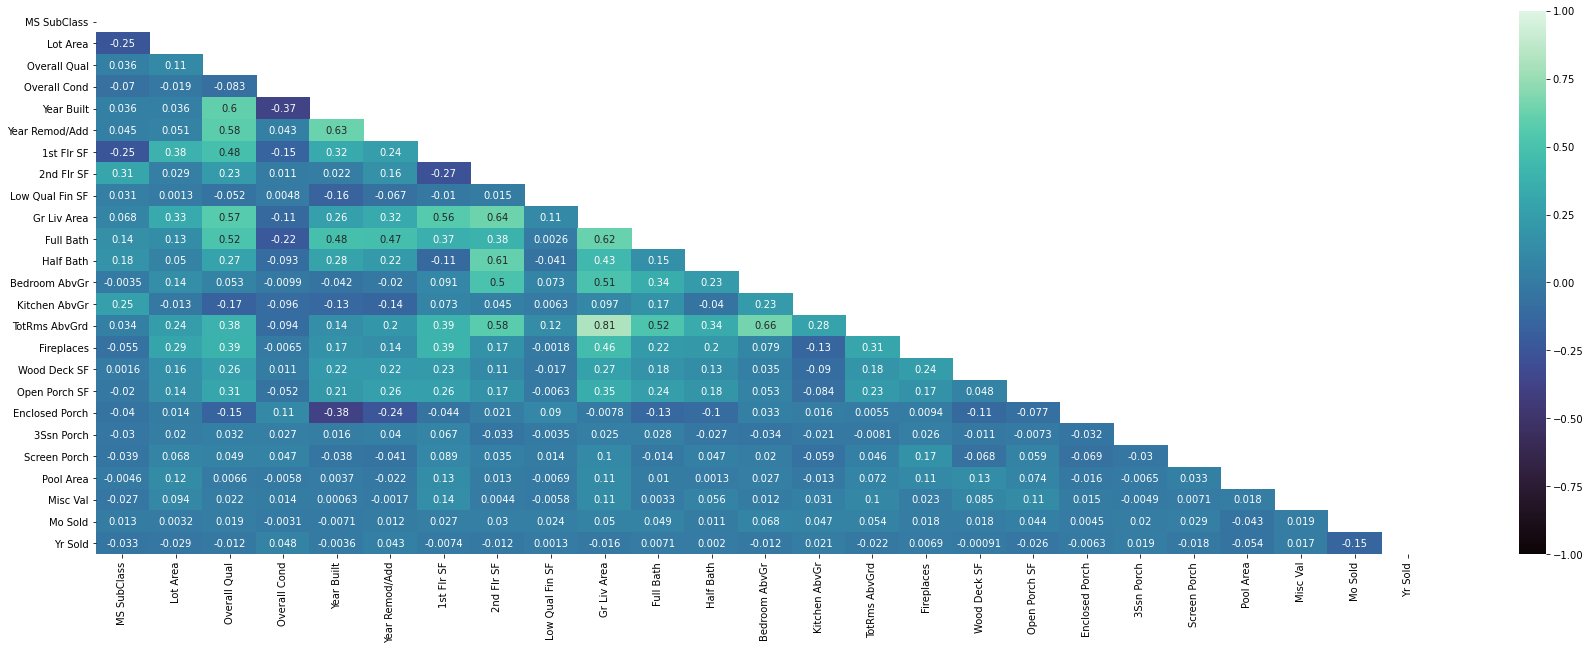

In [222]:
#train_df[null_features].corr()['SalePrice'].sort_values()
#print(corr)
corr = train_df[nulless_features].corr()
# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Plot our correlation heatmap, while masking the upper triangle to be white.
plt.figure(figsize = (30, 10));
sns.heatmap(corr, mask = mask, cmap = 'mako', annot = True, vmin=-1, vmax=1);

In [223]:
#[('Year Remod/Add',0.55), ('Year Built',0.57), ('1st Flr SF',0.62 ), ('Total Bsmt SF',0.63), ('Garage Area',0.65), ('Gr Liv Area',0.7), ('Overall Qual',0.8)]

In [224]:
# Scatter plots of each variable, histograms along diagonal
#sns.pairplot(train_df[nulless_features])

In [225]:
train_df.dropna(subset=['Garage Area','Total Bsmt SF'],inplace=True)

In [226]:
# Creating a submission dataframe out of the original test_df
clean_traindf = train_df.copy()

In [227]:
# Write our sparkly clean dataframe to a csv for Pre-Processing and Feature Engineering
clean_traindf.to_csv(data+'datasets/clean_train.csv')

In [228]:
# Check that everything is copacetic
clean_traindf

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,0.0,873.0,1884.0,GasA,Ex,Y,SBrkr,1728,0,0,1728,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007.0,Fin,2.0,520.0,TA,TA,Y,0,276,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA,Ex,Y,SBrkr,861,0,0,861,0.0,0.0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1961.0,Unf,2.0,539.0,TA,TA,Y,158,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,896.0,896.0,GasA,Gd,Y,SBrkr,1172,741,0,1913,0.0,0.0,1,1,3,1,TA,9,Typ,1,TA,Detchd,1929.0,Unf,2.0,342.0,Fa,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN